In [1]:
# importing of libraries

import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [4]:
# Reading of file to import it into python

train = pd.read_csv("Train.csv")
test = pd.read_csv("Test.csv")

In [5]:
train

,VehicleID,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,VHL12546,Abuja,Honda,Accord Coupe EX V-6,2011.0,Silver,2.20,Nigerian Used,NaN
1,VHL18827,Ibadan,Hyundai,Sonata,2012.0,Silver,3.50,Nigerian Used,125000.0
2,VHL19499,Lagos,Lexus,RX 350,2010.0,Red,9.20,Foreign Used,110852.0
3,VHL17991,Abuja,Mercedes-Benz,GLE-Class,2017.0,Blue,22.80,Foreign Used,30000.0
4,VHL12170,Ibadan,Toyota,Highlander,2002.0,Red,2.60,Nigerian Used,125206.0
...,...,...,...,...,...,...,...,...,...
7200,VHL14329,Abuja,Honda,Civic,2018.0,Gray,5.70,Foreign Used,65000.0
7201,VHL10637,Abuja,BMW,X3,2007.0,White,4.00,Nigerian Used,200000.0
7202,VHL19734,Abuja,Toyota,RAV4 2.5 Limited 4x4,2010.0,Black,2.85,Nigerian Used,NaN
7203,VHL15569,Lagos,Mercedes-Benz,GLK-Class 350,2012.0,Black,8.65,Foreign Used,85750.0


In [6]:
test

,VehicleID,Location,Maker,Model,Year,Colour,Type,Distance
0,VHL18518,Abuja,BMW,323i,2008.0,White,Foreign Used,30524.0
1,VHL17149,Lagos,Toyota,Camry,2013.0,White,Foreign Used,NaN
2,VHL10927,Lagos,Toyota,Highlander Limited V6,2005.0,Gold,Foreign Used,NaN
3,VHL12909,Lagos,Toyota,Camry,2011.0,Gray,Foreign Used,166839.0
4,VHL12348,Lagos,Lexus,ES 350 FWD,2013.0,Red,Foreign Used,88862.0
...,...,...,...,...,...,...,...,...
2056,VHL17903,Abuja,Toyota,Avalon,2020.0,Red,Foreign Used,2650.0
2057,VHL14018,Ibadan,Audi,Q5,2011.0,Blue,Foreign Used,99000.0
2058,VHL17473,Ibadan,Toyota,Camry,2015.0,Black,Foreign Used,108000.0
2059,VHL11480,Abuja,Lexus,IS 350 AWD,2013.0,White,Foreign Used,52485.0


In [10]:
train.drop(["VehicleID"],axis=1,inplace=True)
train.sample()

,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
264,Lagos,Toyota,Camry,2005.0,Green,2.81,Foreign Used,303093.0


In [11]:
test.drop(["VehicleID"],axis=1,inplace=True)
test.sample()

,Location,Maker,Model,Year,Colour,Type,Distance
1264,Lagos,Pontiac,Vibe 1.8L,2010.0,Gray,Foreign Used,294892.0


In [12]:
train.columns

Index(['Location', 'Maker', 'Model', 'Year', 'Colour',
       'Amount (Million Naira)', 'Type', 'Distance'],
      dtype='object')

In [13]:
test.columns

Index(['Location', 'Maker', 'Model', 'Year', 'Colour', 'Type', 'Distance'], dtype='object')

In [14]:
train.isnull().sum()

Location                     0
Maker                        0
Model                        0
Year                        21
Colour                       0
Amount (Million Naira)      17
Type                       197
Distance                  2360
dtype: int64

In [15]:
train = train[~train["Amount (Million Naira)"].isnull()].copy()
train.isnull().sum()

Location                     0
Maker                        0
Model                        0
Year                        21
Colour                       0
Amount (Million Naira)       0
Type                       196
Distance                  2352
dtype: int64

In [16]:
test.isnull().sum()

Location      0
Maker         0
Model         0
Year          2
Colour        0
Type         54
Distance    676
dtype: int64

In [18]:
train_mean_value_year = train["Year"].mean()
print(train_mean_value_year)

train["Year"].fillna(train_mean_value_year,inplace=True)

2011.0311148318683


In [19]:
test_mean_value_year = test["Year"].mean()
print(test_mean_value_year)

test["Year"].fillna(test_mean_value_year,inplace=True)

2011.077221952404


In [24]:
train_mode_value_type = train["Type"].mode()[0]
print(train_mode_value_type)

train["Type"].fillna(train_mode_value_type,inplace =True)

Foreign Used


In [25]:
test_mode_value_type = test["Type"].mode()[0]
print(test_mode_value_type)

test["Type"].fillna(test_mode_value_type,inplace =True)

Foreign Used


In [26]:
train_mean_value_distance = train["Distance"].mean()
print(train_mean_value_distance)

train["Distance"].fillna(train_mean_value_distance, inplace=True)

103239.01199338296


In [44]:
test_mean_value_distance = test["Distance"].mean()
print(test_mean_value_distance)

test["Distance"].fillna(test_mean_value_distance, inplace=True)

103801.3828125


In [45]:
train['Year'] =train['Year'].astype('int32')
test['Year'] = test['Year'].astype('int32')

In [46]:
train['Distance'] = train['Distance'].astype('float32')
test['Distance'] = test['Distance'].astype('float32')

In [48]:
display(train.sample())
display(test.sample())

,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
7086,Lagos,Lexus,RX,2013,Silver,12.8,Foreign Used,103239.015625


,Location,Maker,Model,Year,Colour,Type,Distance
560,Abuja,Mercedes-Benz,GLK-Class 350 4MATIC,2013,Blue,Foreign Used,52352.0


In [36]:
train.duplicated().sum()

1

In [37]:
test.duplicated().sum()

33

In [49]:
train.drop_duplicates()

,Location,Maker,Model,Year,Colour,Amount (Million Naira),Type,Distance
0,Abuja,Honda,Accord Coupe EX V-6,2011,Silver,2.20,Nigerian Used,103239.015625
1,Ibadan,Hyundai,Sonata,2012,Silver,3.50,Nigerian Used,125000.000000
2,Lagos,Lexus,RX 350,2010,Red,9.20,Foreign Used,110852.000000
3,Abuja,Mercedes-Benz,GLE-Class,2017,Blue,22.80,Foreign Used,30000.000000
4,Ibadan,Toyota,Highlander,2002,Red,2.60,Nigerian Used,125206.000000
...,...,...,...,...,...,...,...,...
7200,Abuja,Honda,Civic,2018,Gray,5.70,Foreign Used,65000.000000
7201,Abuja,BMW,X3,2007,White,4.00,Nigerian Used,200000.000000
7202,Abuja,Toyota,RAV4 2.5 Limited 4x4,2010,Black,2.85,Nigerian Used,103239.015625
7203,Lagos,Mercedes-Benz,GLK-Class 350,2012,Black,8.65,Foreign Used,85750.000000


In [50]:
display(train.isnull().sum())
display(test.isnull().sum())

Location                  0
Maker                     0
Model                     0
Year                      0
Colour                    0
Amount (Million Naira)    0
Type                      0
Distance                  0
dtype: int64

Location    0
Maker       0
Model       0
Year        0
Colour      0
Type        0
Distance    0
dtype: int64

In [52]:
catvars = train.select_dtypes(include=["object"]).columns
numvars = train.select_dtypes(include=["int32","int64","float32","float64"]).columns

catvars, numvars

(Index(['Location', 'Maker', 'Model', 'Colour', 'Type'], dtype='object'),
 Index(['Year', 'Amount (Million Naira)', 'Distance'], dtype='object'))

In [53]:
catvars = test.select_dtypes(include=["object"]).columns
numvars = test.select_dtypes(include=["int32","int64","float32","float64"]).columns

catvars, numvars

(Index(['Location', 'Maker', 'Model', 'Colour', 'Type'], dtype='object'),
 Index(['Year', 'Distance'], dtype='object'))

C:\Users\LENOVO T460S\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Amount (Million Naira)', ylabel='Density'>

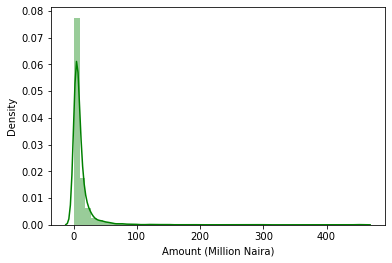

In [54]:
sns.distplot(train["Amount (Million Naira)"],color="green")

C:\Users\LENOVO T460S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LENOVO T460S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\LENOVO T460S\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\L

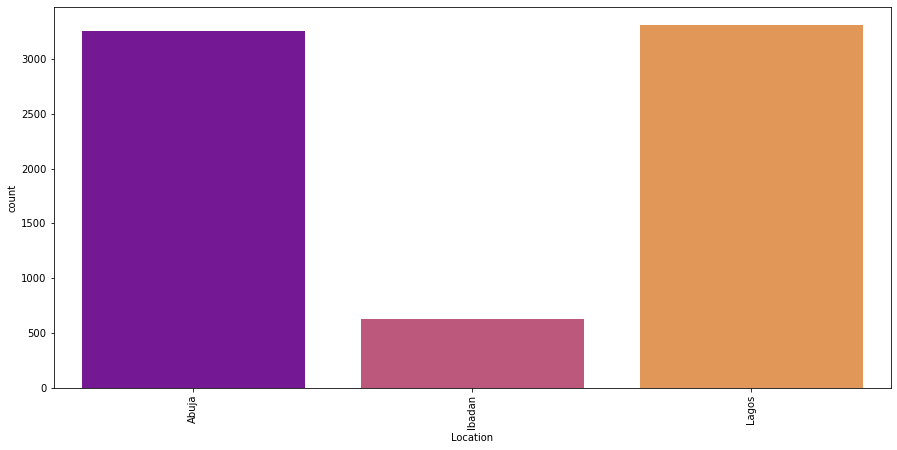

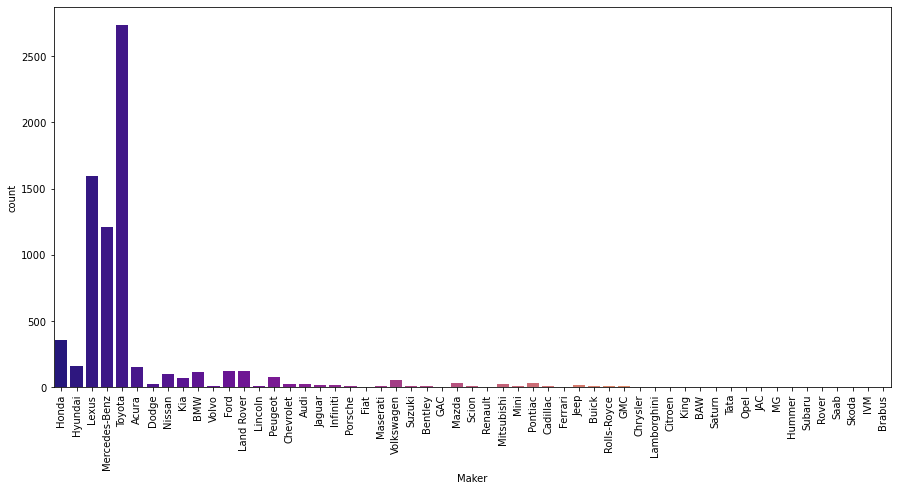

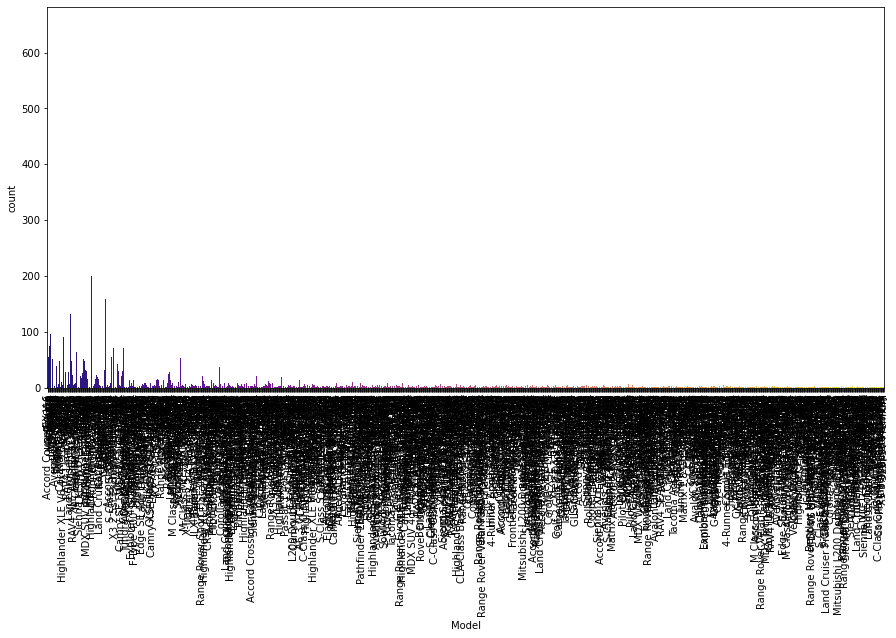

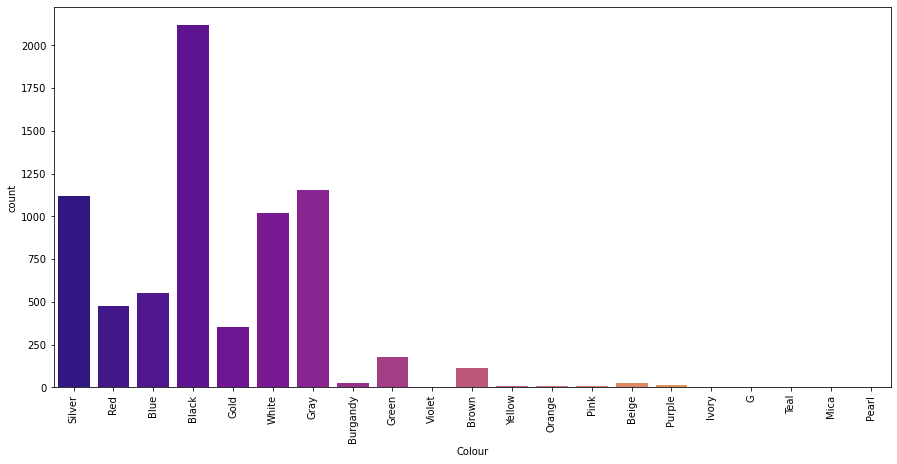

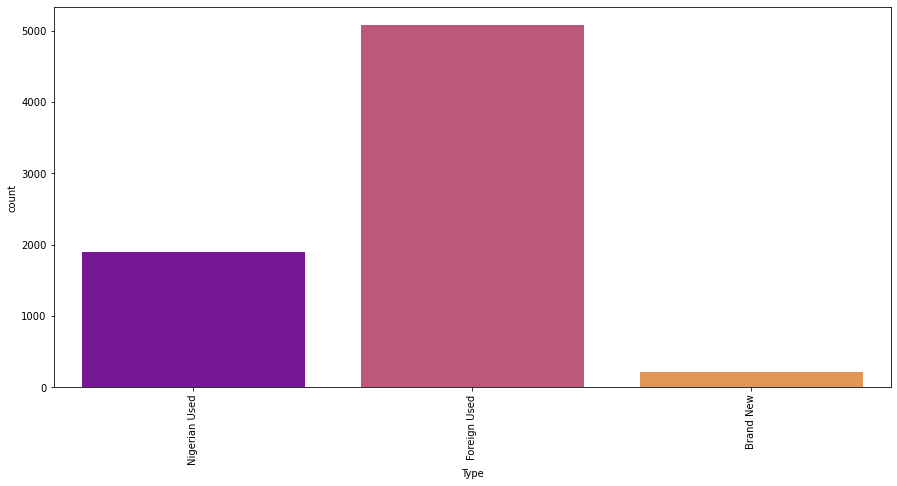

In [56]:
## plotting countplots for the categorical variables

def drawplot(col):
    plt.figure(figsize=(15,7))
    sns.countplot(train[col],palette='plasma')
    plt.xticks(rotation='vertical')
    
toview = ['Location', 'Maker', 'Model', 'Colour', 'Type']
for col in toview:
    drawplot(col)

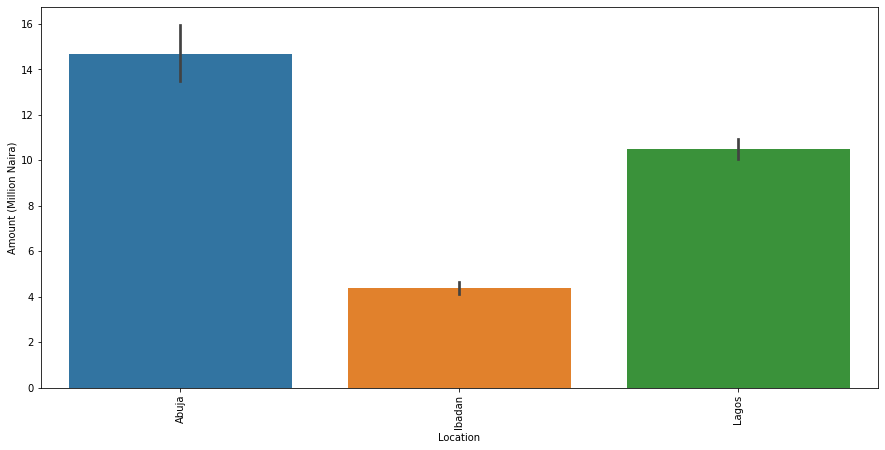

In [57]:
plt.figure(figsize=(15,7))
sns.barplot(x = train['Location'],y = train['Amount (Million Naira)'])
plt.xticks(rotation = 'vertical')
plt.show()

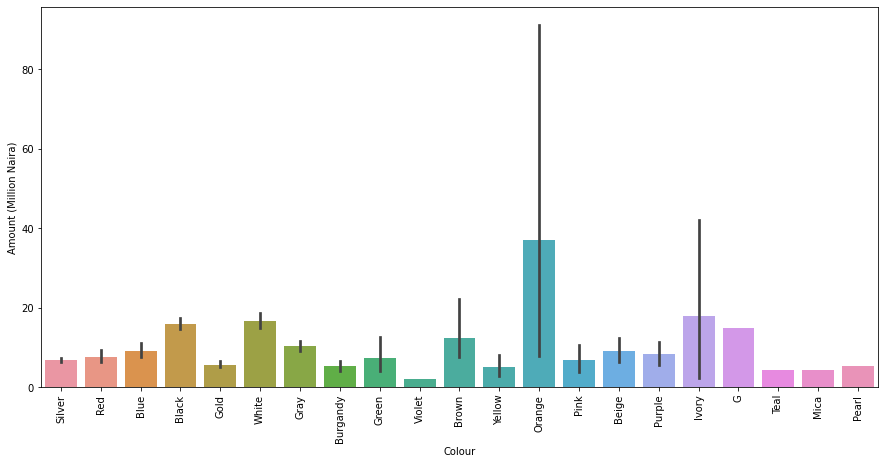

In [59]:
plt.figure(figsize=(15,7))
sns.barplot(x = train['Colour'],y = train['Amount (Million Naira)'])
plt.xticks(rotation = 'vertical')
plt.show()

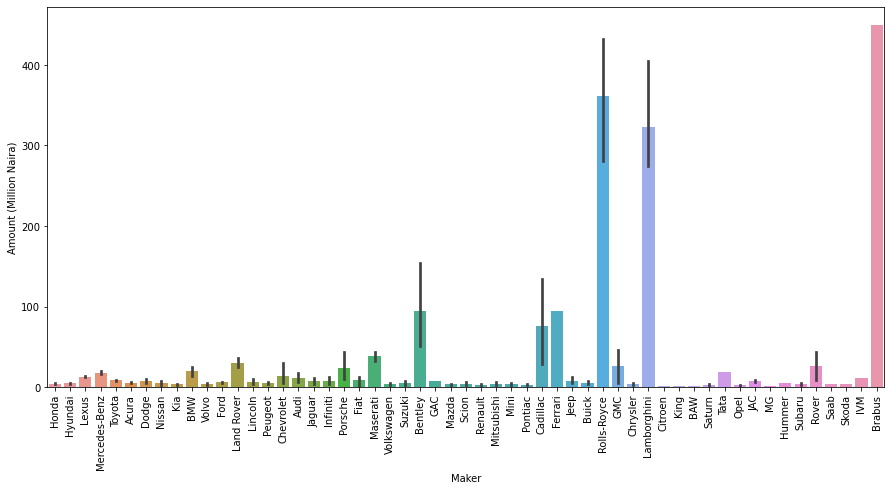

In [60]:
plt.figure(figsize=(15,7))
sns.barplot(x = train['Maker'],y = train['Amount (Million Naira)'])
plt.xticks(rotation = 'vertical')
plt.show()

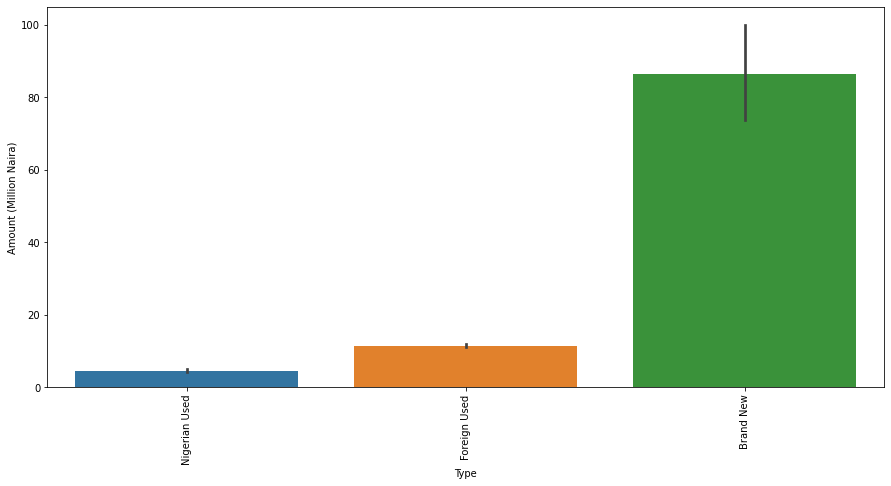

In [61]:
plt.figure(figsize=(15,7))
sns.barplot(x = train['Type'],y = train['Amount (Million Naira)'])
plt.xticks(rotation = 'vertical')
plt.show()

<AxesSubplot:xlabel='Distance', ylabel='Amount (Million Naira)'>

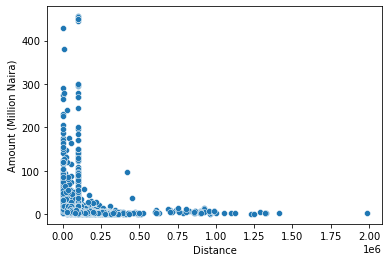

In [62]:
sns.scatterplot(x = train["Distance"], y = train["Amount (Million Naira)"])

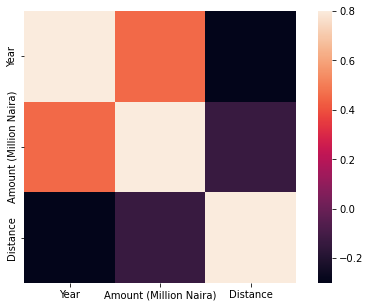

In [63]:
#Correlation matrix

cormat = train.corr()
f,ax = plt.subplots(figsize=(8,5))
sns.heatmap(cormat, vmax=.8,square=True);

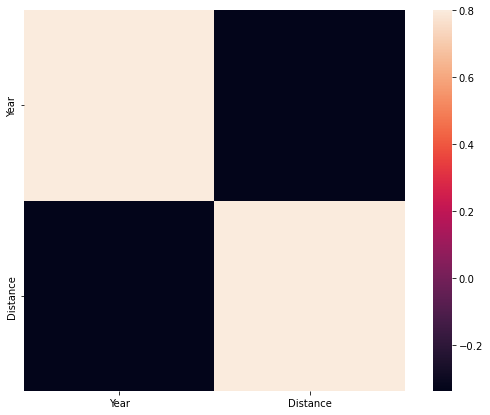

In [64]:
cormat = test.corr()
f,ax = plt.subplots(figsize=(10,7))
sns.heatmap(cormat, vmax=.8,square=True);

In [65]:
cat_features = ["Location","Maker","Colour","Type","Model"]

for cat_feature in cat_features:
    train[f"{cat_feature}_cat"] = train[cat_feature].astype('category')
    train[f"{cat_feature}_cat"] = train[f"{cat_feature}_cat"].cat.codes
    

In [66]:
cat_features = ["Location","Maker","Colour","Type","Model"]

for cat_feature in cat_features:
    test[f"{cat_feature}_cat"] = test[cat_feature].astype('category')
    test[f"{cat_feature}_cat"] = test[f"{cat_feature}_cat"].cat.codes
    

In [67]:
train.drop(["Location","Maker","Colour","Type","Model"],axis=1,inplace=True)
display(train.head())

,Year,Amount (Million Naira),Distance,Location_cat,Maker_cat,Colour_cat,Type_cat,Model_cat
0,2011,2.2,103239.015625,0,17,16,2,116
1,2012,3.5,125000.000000,1,19,16,2,1047
2,2010,9.2,110852.000000,2,29,15,1,906
3,2017,22.8,30000.000000,0,34,2,1,506
4,2002,2.6,125206.000000,1,52,15,2,567


In [68]:
test.drop(["Location","Maker","Colour","Type","Model"],axis=1,inplace=True)
display(test.head())

,Year,Distance,Location_cat,Maker_cat,Colour_cat,Type_cat,Model_cat
0,2008,30524.000000,0,2,16,1,8
1,2013,103800.671875,2,37,16,1,123
2,2005,103800.671875,2,37,7,1,272
3,2011,166839.000000,2,37,8,1,123
4,2013,88862.000000,2,20,12,1,192


<AxesSubplot:xlabel='Location_cat', ylabel='Amount (Million Naira)'>

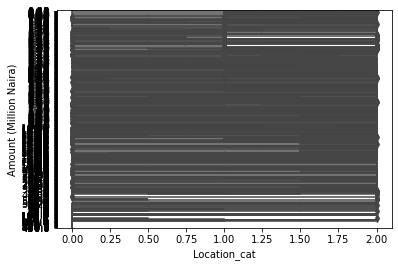

In [70]:
sns.boxplot(x="Location_cat",y="Amount (Million Naira)",data=train,orient="h",width=1.0)

In [71]:
y = train["Amount (Million Naira)"] 
x = train.drop("Amount (Million Naira)", axis=1)

In [72]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=67)

In [73]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(x_train,y_train)

In [74]:
reg.predict(x_test)

array([29.91486754,  3.77836221,  1.163173  , ...,  8.75774751,
        8.87786924, 11.53273957])

In [75]:
from sklearn.metrics import mean_squared_error

# we are using mean_absolute_error because this is a regression model

y_pred = reg.predict(x_test)

print(f"Mean Squared Error is:{mean_squared_error(y_test,y_pred)}")

Mean Squared Error is:662.5219590843695


In [76]:
mse = mean_squared_error(y_test,y_pred)
rmse = mean_squared_error(y_test,y_pred,squared = False)
rmse

25.73950191989677

In [77]:
test_pred = reg.predict(test)
test_pred

array([ 7.35048247, 11.33188942, -0.99945744, ..., 19.51494977,
       17.48900698, 11.78722038])

In [78]:
sub = pd.read_csv("SampleSubmission.csv")
sub

,VehicleID,Amount (Million Naira)
0,VHL18518,1.0
1,VHL17149,1.0
2,VHL10927,1.0
3,VHL12909,1.0
4,VHL12348,1.0
...,...,...
2056,VHL17903,1.0
2057,VHL14018,1.0
2058,VHL17473,1.0
2059,VHL11480,1.0


In [79]:
sub['Amount (Million Naira)'] = test_pred
sub

,VehicleID,Amount (Million Naira)
0,VHL18518,7.350482
1,VHL17149,11.331889
2,VHL10927,-0.999457
3,VHL12909,9.324517
4,VHL12348,13.594839
...,...,...
2056,VHL17903,28.226850
2057,VHL14018,16.163935
2058,VHL17473,19.514950
2059,VHL11480,17.489007


In [81]:
sub.to_csv("example5.csv", index=False)